In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functools

%matplotlib inline

#plt.rcParams['figure.figsize'] = [10,5]

# Set columns to full width
#pd.set_option('display.max_columns', None)  

df = pd.read_csv(".\\EmailData.csv", encoding = "ISO-8859-1", dtype={'Subject': str} )
df['Subject'] = df['Subject'].astype(str) 
df = df.dropna(subset=['Body'])
df.sort_values(by=['Received'], inplace=True)
df.drop(columns=['Received', 'Received'], inplace=True)

df['Text'] = df['Subject'] + ' ' + df['Body']

class_values = df.Class.values
labels = class_values = class_values.reshape(-1,1)


df.head(100)




,Subject,Sender,Body,Class,Text
1078,A very happy New Year to you and your family,Bernard.CHARLES@3ds.com,\r\n\r\n\r\n \r\n\r\nDear colleagues and frien...,Others,A very happy New Year to you and your family \...
193,"[IT News] MAINTENANCE - DSx.Client Care, DSx.R...",IT.News@corp.3ds.com,"\t Saturday, January 12, 2019 06:00 (JST) to ...",Others,"[IT News] MAINTENANCE - DSx.Client Care, DSx.R..."
1077,Update: Compass #14 available now!,Internal.Coms@3ds.com,\t\r\n \r\n\r\n \r\n\r\n \r\n\r\n <http://www....,Others,Update: Compass #14 available now! \t\r\n \r\...
59,"Offer (OTC) News | High-Tech ""Highly Virtual P...",sales.otc-news@3ds.com,<https://imgssl.constantcontact.com/letters/i...,Others,"Offer (OTC) News | High-Tech ""Highly Virtual P..."
192,"[IT News] MAINTENANCE - DSx.Client Care, DSx.R...",IT.News@corp.3ds.com,"\t Saturday, January 12, 2019 06:00 (JST) to ...",Others,"[IT News] MAINTENANCE - DSx.Client Care, DSx.R..."
191,[IT News] MAINTENANCE - DSx.BI and DSx.People ...,IT.News@corp.3ds.com,"\t Tuesday, January 15, 2019 20:00 (JST) to T...",Others,[IT News] MAINTENANCE - DSx.BI and DSx.People ...
58,Offer (OTC) News | ENOVIA QUMAS R2019x is avai...,sales.otc-news@3ds.com,<https://imgssl.constantcontact.com/letters/i...,Others,Offer (OTC) News | ENOVIA QUMAS R2019x is avai...
3,Woolworth Load and Performance Test removal,DELMIA.Quintiq.HS.noreply@3ds.com,\r\n\r\n \r\n\r\n\r\n\r\nKindly be advised th...,Project,Woolworth Load and Performance Test removal \...
57,Offer (OTC) News | High-Tech Portfolio Re-engi...,sales.otc-news@3ds.com,<https://imgssl.constantcontact.com/letters/i...,Others,Offer (OTC) News | High-Tech Portfolio Re-engi...
1076,Year Launch 2019: Bernard Charlès presents 3DS...,Internal.Coms@3ds.com,\r\n\r\n \r\n\r\nTo discover the 3DS vision an...,Others,Year Launch 2019: Bernard Charlès presents 3DS...


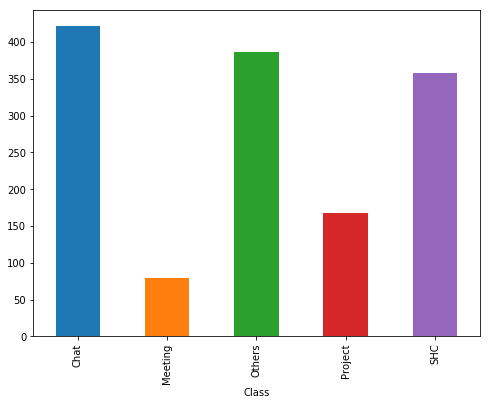

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Class').Sender.count().plot.bar(ylim=0)
plt.show()



[2 1 0 3]


In [20]:
# Text representation

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, 
                        min_df=5, 
                        norm='l2', 
                        encoding='latin-1', 
                        ngram_range=(1, 3), 
                        stop_words='english')
features = tfidf.fit_transform(df.Text).toarray()
features.shape

(1428, 20168)

In [ ]:
# find the terms that are the most correlated with each of labels 

from sklearn.feature_selection import chi2
import numpy as np
N = 2
test_labels = ["Project","Others", "Chat","SHC"]
for value in test_labels:
  features_chi2 = chi2(features, labels == value)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("#", value)    
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Class'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [39]:
print(clf.predict(count_vect.transform(["""

Hi All,

I understand the restrictions of the Bronze Hosting SLA and the need to update the .jks file. However if we are updating configuration in any way that could affect the customer, either in working hours or not we need to let them know of any potential downtime and get their buy in. 

I propose the following steps should be taken:

•	DQHS define the password complexity needed
•	We will work with the customer to define the password within Azure
•	We will provide a new .jks file to DQHS
•	We will notify the customer of the update to the test system
•	DQHS will work with us to update the test system with the new .jks file and test this update
•	Kiwi Rail test and sign off
•	If successful  
o	We will notify the customer of the update to the Production system
o	DQHS will work with us to update the production system with the new .jks file and test this update
o	Kiwi Rail test and sign off

Even though this is a small change we should have a deployment process, we also need to test that the change works. I also feel we should have the customers sign off to keep them involved, this will make sure they understand the change and why it is needed.

I would highly recommend making this change within the next deployment window which will be approximately 3/4 weeks’ time. This would work well as we will have to test the FAID connection during the smoke testing anyway and using the same deployment window would minimize any extra time taken by us, DQHS and the customer.  


Best Regards,

David GOODE 
BUANZ Solutions/Tech

 


Office: +61 3 9274 1018
david.goode@3ds.com
	 

3DS.COM/DELMIA
		

DS Australia Pty Ltd. | 15 William Street | 3000 Melbourne | Australia



 


"""])))


['Others']


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.groupby('model_name').accuracy.mean()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

model_name
LinearSVC                 0.966992
LogisticRegression        0.952270
MultinomialNB             0.958593
RandomForestClassifier    0.881557
Name: accuracy, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


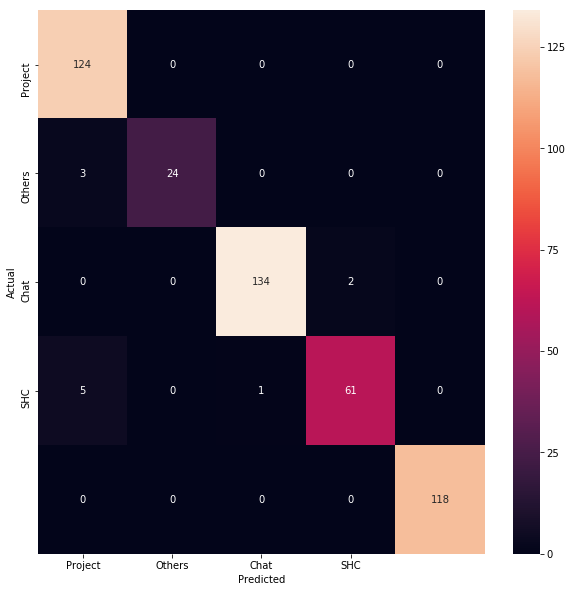

Accuracy: 0.9766949152542372


In [35]:
import seaborn as sns
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=test_labels, yticklabels=test_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
